# Plot filtered tf corrected external data

In [1]:
from pixell import reproject, enmap, utils, enplot
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pymaster as nmt
from pixell import curvedsky

In [2]:
%matplotlib inline

In [3]:
### Parameters for initial external data
dir_initial_data = '/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/data'
exp = 'planck'
maps_type_A = 'npipe6v20A'
maps_type_B = 'npipe6v20B'
band = '100'
nside = 512
res = 1.0
lmax = 2160

In [4]:
### geometry template 
# (used to reproject the initial maps in the same geometry as the filtered coadded maps)
path_iso_geometry_template = '/home/ar3186/pwg-scripts/iso-sat-review/mapmaking/band_car_fejer1_5arcmin.fits'

### iso-sat analysis mask
# (used in soopercool to compute the TF corrected filtered coadded data ps)
path_iso_analysis_mask = '/scratch/gpfs/SIMONSOBS/sat-iso/transfer_function/satp3/south/soopercool_outputs/science/masks/analysis_mask.fits'

### binning used in soopercool for the filtered data (same to be used for the initial data)
binning_file = '/scratch/gpfs/SIMONSOBS/sat-iso/transfer_function/soopercool_inputs/binning_car_lmax2160_deltal15_large_first_bin.npz'

In [5]:
### Parameters for filtered coadded external data maps and their TF corrected cls
# path_maps_filtered_coadded = '/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/filtered_data/planck/npipe6v20_A_B/satp3/f090/coadded_maps/planck_car_100_bundle0_res1.0amin_coords_c_f090_science_filtered.fits' #'/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/filtered_data/planck/npipe6v20/satp3/f090/coadded_maps/planck_car_100_res1.0amin_coords_c_bundle0_f090_det_lower_filtered.fits'
path_cls_filtered_coadded_tf = '/scratch/gpfs/SIMONSOBS/users/ar3186/external_data/filtered_data/planck/npipe6v20_A_B/satp3/f100/soopercool_outputs/cells/decoupled_auto_pcls_planck_f100_filtered_SATp3_f090_south_science_x_planck_f100_filtered_SATp3_f090_south_science.npz'

In [6]:
dwg = 5  # downgrade for pixell map plots (except full sky maps)

## Initial external data maps

In [7]:
## Maps initial external data full sky in hp
path_maps_initial_data_hp_A = f'{dir_initial_data}/{exp}/maps/{maps_type_A}/{exp}_hp_{band}_bundle0_nside{nside}_coords_c.fits'
path_maps_initial_data_hp_B = f'{dir_initial_data}/{exp}/maps/{maps_type_B}/{exp}_hp_{band}_bundle1_nside{nside}_coords_c.fits'
maps_initial_data_hp_A = hp.read_map(path_maps_initial_data_hp_A, field=(0,1,2))
maps_initial_data_hp_B = hp.read_map(path_maps_initial_data_hp_B, field=(0,1,2))

# fig = plt.figure(figsize=(10., 3.))
# plt.suptitle(f'initial {exp} {band} GHz full sky', fontsize=16)
# for istokes, stokes in enumerate(['I', 'Q', 'U']):
#     hp.mollview(maps_initial_data_hp[istokes], title=f'{stokes}', coord='c', norm='hist', unit=r'K$_{CMB}$', sub=(1, 3, istokes + 1))

In [8]:
# ## Maps initial external data full sky in car
# path_maps_initial_data_car = f'{dir_initial_data}/{exp}/maps/{maps_type}/{exp}_car_{band}A_res{res}amin_coords_c.fits'
# maps_initial_data_car = enmap.read_map(path_maps_initial_data_car)

# for istokes, stokes in enumerate(['I', 'Q', 'U']):
#     print(f'initial {exp} {band} GHz full sky {stokes} map:')
#     enplot.pshow(maps_initial_data_car[istokes], colorbar=True, downgrade=20)

In [9]:
## Maps initial external data partial sky (--> geometry of the iso-sat analysis: band and 5amin) in car
# (we always use this geometry everywhere)

# get the geometry of the template
shape, wcs = enmap.read_map_geometry(path_iso_geometry_template)

# reproject the initial hp map to car with the geometry from the iso template
maps_initial_data_car_isogeo_A = reproject.healpix2map(maps_initial_data_hp_A, shape=shape, wcs=wcs)
maps_initial_data_car_isogeo_B = reproject.healpix2map(maps_initial_data_hp_B, shape=shape, wcs=wcs)

# # plot
# for istokes, stokes in enumerate(['I', 'Q', 'U']):
#     print(f'Initial {exp} {band} GHz {stokes} map in iso geometry:')
#     enplot.pshow(maps_initial_data_car_isogeo[istokes], colorbar=True, downgrade=dwg)

In [10]:
## Maps initial external data partial sky (--> iso-sat analysis mask) in car

# load iso-sat analysis mask
analysis_mask_car = enmap.read_map(path_iso_analysis_mask)
# print('iso-sat analysis mask:')
# enplot.pshow(analysis_mask_car, colorbar=True, downgrade=dwg)

Initial planck 100 GHz I map w/ iso-sat analysis mask:


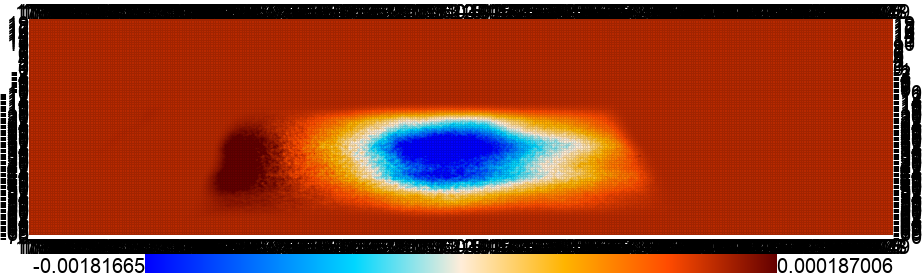

Initial planck 100 GHz Q map w/ iso-sat analysis mask:


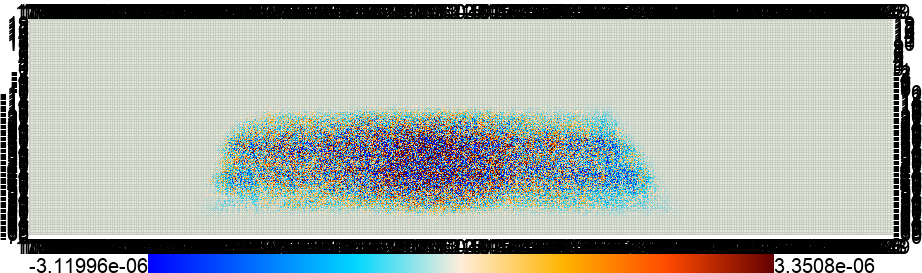

Initial planck 100 GHz U map w/ iso-sat analysis mask:


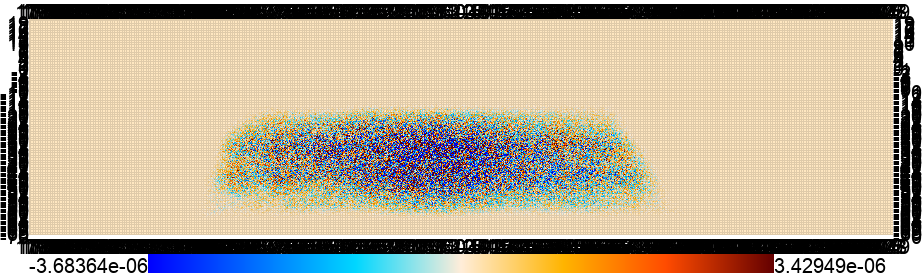

In [11]:
for istokes, stokes in enumerate(['I', 'Q', 'U']):
    print(f'Initial {exp} {band} GHz {stokes} map w/ iso-sat analysis mask:')
    enplot.pshow(maps_initial_data_car_isogeo_A[istokes]*analysis_mask_car, colorbar=True, downgrade=dwg)

Initial planck 100 GHz I map w/ iso-sat analysis mask:


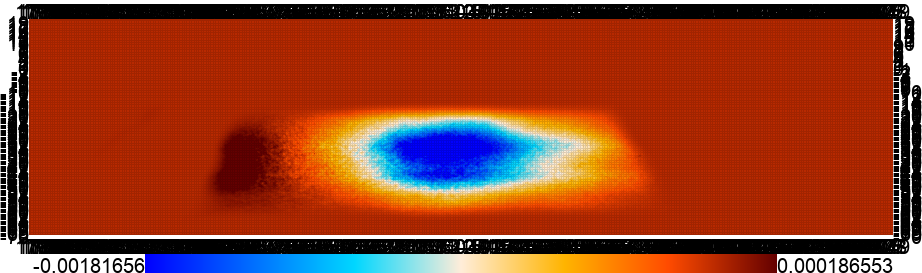

Initial planck 100 GHz Q map w/ iso-sat analysis mask:


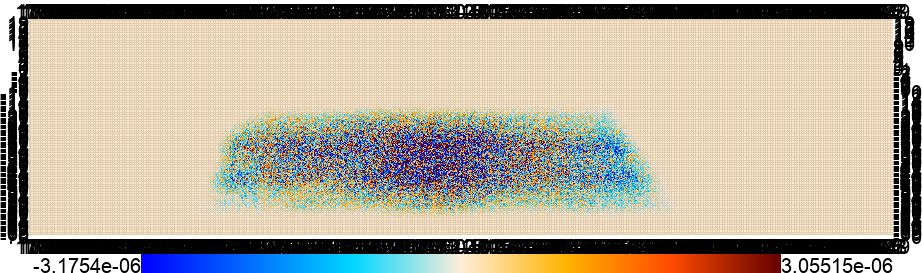

Initial planck 100 GHz U map w/ iso-sat analysis mask:


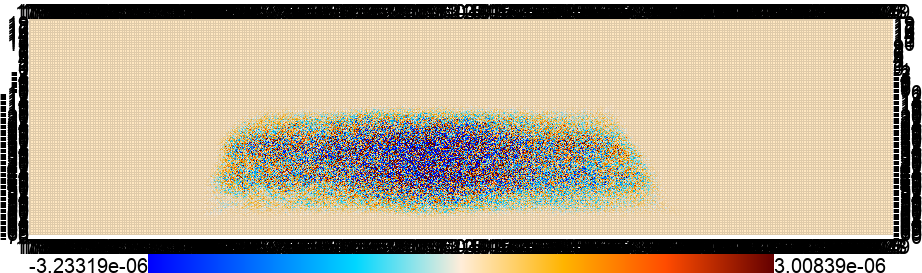

In [12]:
for istokes, stokes in enumerate(['I', 'Q', 'U']):
    print(f'Initial {exp} {band} GHz {stokes} map w/ iso-sat analysis mask:')
    enplot.pshow(maps_initial_data_car_isogeo_B[istokes]*analysis_mask_car, colorbar=True, downgrade=dwg)

## Compare Cls initial external data VS filtered coadded tf corrected external data

(from soopercool for the filtered coadded maps, analogus to that for the initial external data)

In [13]:
cls_filtered_coadded_tf = np.load(path_cls_filtered_coadded_tf)
print(list(cls_filtered_coadded_tf.keys()))

['lb', 'TT', 'TE', 'TB', 'ET', 'EE', 'EB', 'BT', 'BE', 'BB']


In [14]:
binning_edges = np.load(binning_file)
print(list(binning_edges.keys()))
binning_edges['bin_low'], binning_edges['bin_high']
bin_obj = nmt.NmtBin.from_edges(ell_ini=binning_edges['bin_low'][:-1], ell_end=binning_edges['bin_high'][:-1], is_Dell=False)
lmax=2158

['bin_low', 'bin_high', 'bin_center']


In [15]:
binning_edges['bin_center']

array([  14.5,   37. ,   52. ,   67. ,   82. ,   97. ,  112. ,  127. ,
        142. ,  157. ,  172. ,  187. ,  202. ,  217. ,  232. ,  247. ,
        262. ,  277. ,  292. ,  307. ,  322. ,  337. ,  352. ,  367. ,
        382. ,  397. ,  412. ,  427. ,  442. ,  457. ,  472. ,  487. ,
        502. ,  517. ,  532. ,  547. ,  562. ,  577. ,  592. ,  607. ,
        622. ,  637. ,  652. ,  667. ,  682. ,  697. ,  712. ,  727. ,
        742. ,  757. ,  772. ,  787. ,  802. ,  817. ,  832. ,  847. ,
        862. ,  877. ,  892. ,  907. ,  922. ,  937. ,  952. ,  967. ,
        982. ,  997. , 1012. , 1027. , 1042. , 1057. , 1072. , 1087. ,
       1102. , 1117. , 1132. , 1147. , 1162. , 1177. , 1192. , 1207. ,
       1222. , 1237. , 1252. , 1267. , 1282. , 1297. , 1312. , 1327. ,
       1342. , 1357. , 1372. , 1387. , 1402. , 1417. , 1432. , 1447. ,
       1462. , 1477. , 1492. , 1507. , 1522. , 1537. , 1552. , 1567. ,
       1582. , 1597. , 1612. , 1627. , 1642. , 1657. , 1672. , 1687. ,
      

### TT

In [16]:
# compute ps for initial external data in car and with the iso-sat geometry
field_TT_A = nmt.NmtField(mask=analysis_mask_car, maps=[maps_initial_data_car_isogeo_A[0]], wcs=wcs, lmax=lmax, lmax_mask=lmax)
field_TT_B = nmt.NmtField(mask=analysis_mask_car, maps=[maps_initial_data_car_isogeo_B[0]], wcs=wcs, lmax=lmax, lmax_mask=lmax)
cls_initial_TT = (nmt.compute_full_master(field_TT_A, field_TT_B, bin_obj))

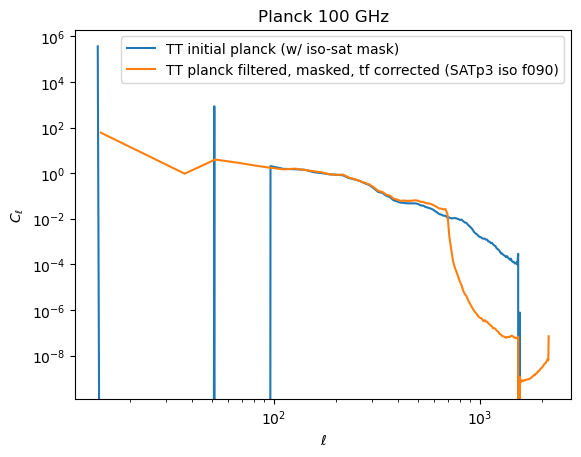

In [17]:
plt.plot(bin_obj.get_effective_ells(), cls_initial_TT[0]*1e12, label=f'TT initial {exp} (w/ iso-sat mask)')
plt.plot(cls_filtered_coadded_tf['lb'], cls_filtered_coadded_tf['TT'], label=f'TT {exp} filtered, masked, tf corrected (SATp3 iso f090)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.title('Planck 100 GHz')
plt.legend()
plt.show()

### EE

In [ ]:
# compute ps for initial external data in car and with the iso-sat geometry
field_pol_A = nmt.NmtField(mask=analysis_mask_car, maps=[maps_initial_data_car_isogeo_A[1], maps_initial_data_car_isogeo_A[2]], wcs=wcs, lmax=lmax, lmax_mask=lmax)
field_pol_B = nmt.NmtField(mask=analysis_mask_car, maps=[maps_initial_data_car_isogeo_B[1], maps_initial_data_car_isogeo_B[2]], wcs=wcs, lmax=lmax, lmax_mask=lmax)
cls_initial_pol = (nmt.compute_full_master(field_pol_A, field_pol_B, bin_obj))

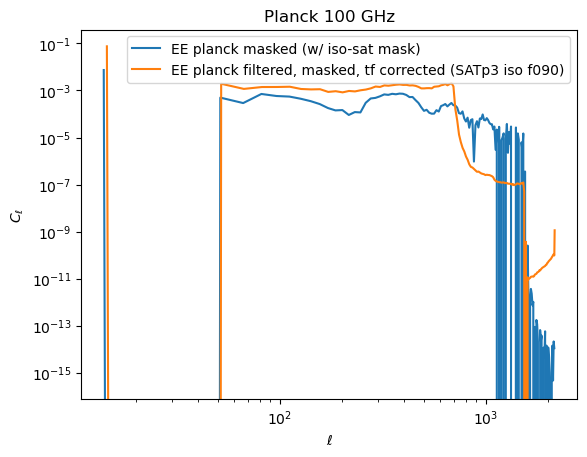

In [20]:
plt.plot(bin_obj.get_effective_ells(), cls_initial_pol[0]*1e12, label=f'EE {exp} masked (w/ iso-sat mask)')
plt.plot(cls_filtered_coadded_tf['lb'], cls_filtered_coadded_tf['EE'], label=f'EE {exp} filtered, masked, tf corrected (SATp3 iso f090)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.title('Planck 100 GHz')
plt.legend()
plt.show()

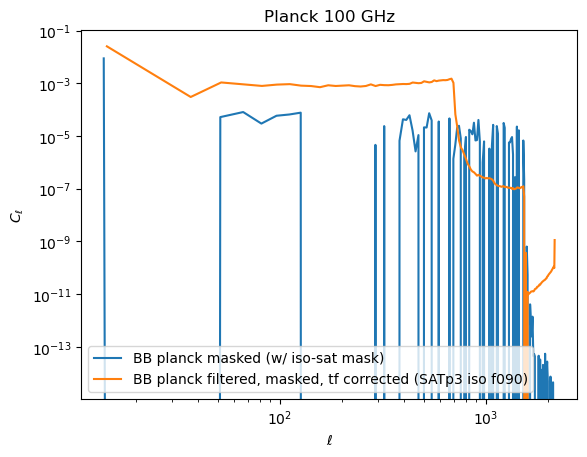

In [21]:
plt.plot(bin_obj.get_effective_ells(), cls_initial_pol[3]*1e12, label=f'BB {exp} masked (w/ iso-sat mask)')
plt.plot(cls_filtered_coadded_tf['lb'], cls_filtered_coadded_tf['BB'], label=f'BB {exp} filtered, masked, tf corrected (SATp3 iso f090)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.title('Planck 100 GHz')
plt.legend()
plt.show()